In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
plt.rcParams['font.family'] = 'Noto Sans CJK JP'


from module import config_lib, utils_lib

In [14]:
cfg = config_lib.CFG()
utils_lib.set_seed(cfg.seed)

In [15]:
train_label = pd.read_csv(cfg.train_csv)
submission = pd.read_csv(cfg.submission_csv)
taxonomy = pd.read_csv(cfg.taxonomy_csv)

In [18]:
train_label.head()

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0


In [20]:
taxonomy.head()

,primary_label,inat_taxon_id,scientific_name,common_name,class_name
0,1139490,1139490,Ragoniella pulchella,Ragoniella pulchella,Insecta
1,1192948,1192948,Oxyprora surinamensis,Oxyprora surinamensis,Insecta
2,1194042,1194042,Copiphora colombiae,Copiphora colombiae,Insecta
3,126247,126247,Leptodactylus insularum,Spotted Foam-nest Frog,Amphibia
4,1346504,1346504,Neoconocephalus brachypterus,Neoconocephalus brachypterus,Insecta


In [21]:
df = pd.merge(train_label, taxonomy[["primary_label", "inat_taxon_id","class_name"]], on='primary_label', how='left')
df.head()

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license,inat_taxon_id,class_name
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1139490,Insecta
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1139490,Insecta
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1192948,Insecta
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1192948,Insecta
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1192948,Insecta


In [25]:
print("\n欠損値:\n", df.isnull().sum())
print("\nデータ型:\n", df.dtypes)



欠損値:
 primary_label         0
secondary_labels      0
type                  0
filename              0
collection            0
rating                0
url                   0
latitude            809
longitude           809
scientific_name       0
common_name           0
author                0
license               0
inat_taxon_id         0
class_name            0
file_extension        0
dtype: int64

データ型:
 primary_label        object
secondary_labels     object
type                 object
filename             object
collection           object
rating              float64
url                  object
latitude            float64
longitude           float64
scientific_name      object
common_name          object
author               object
license              object
inat_taxon_id         int64
class_name           object
file_extension       object
dtype: object


In [26]:

# --- primary_label の分布 ---
print("\nprimary_label のユニーク数:", df['primary_label'].nunique())
print("\nprimary_label 上位10件:\n", df['primary_label'].value_counts().head(10))




primary_label のユニーク数: 206

primary_label 上位10件:
 primary_label
grekis     990
compau     808
trokin     787
roahaw     709
banana     610
whtdov     572
socfly1    543
yeofly1    525
bobfly1    514
wbwwre1    499
Name: count, dtype: int64


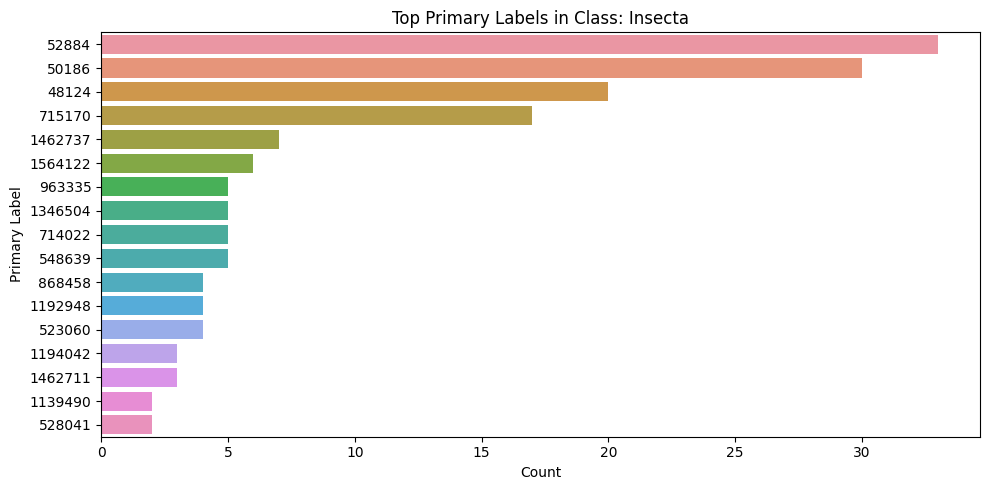

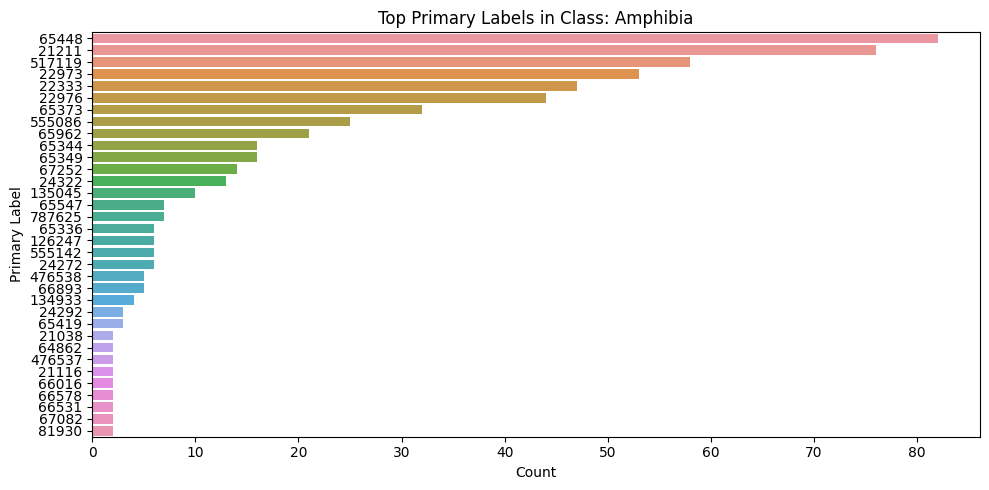

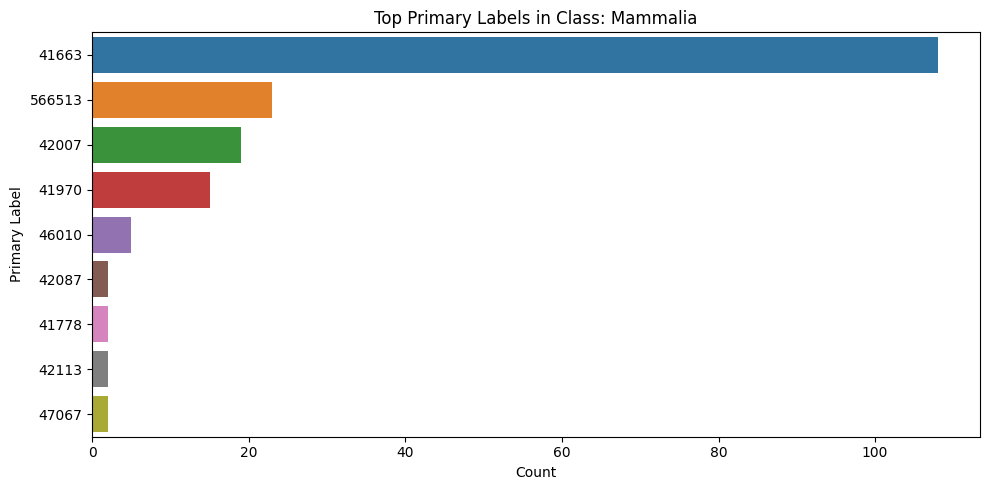

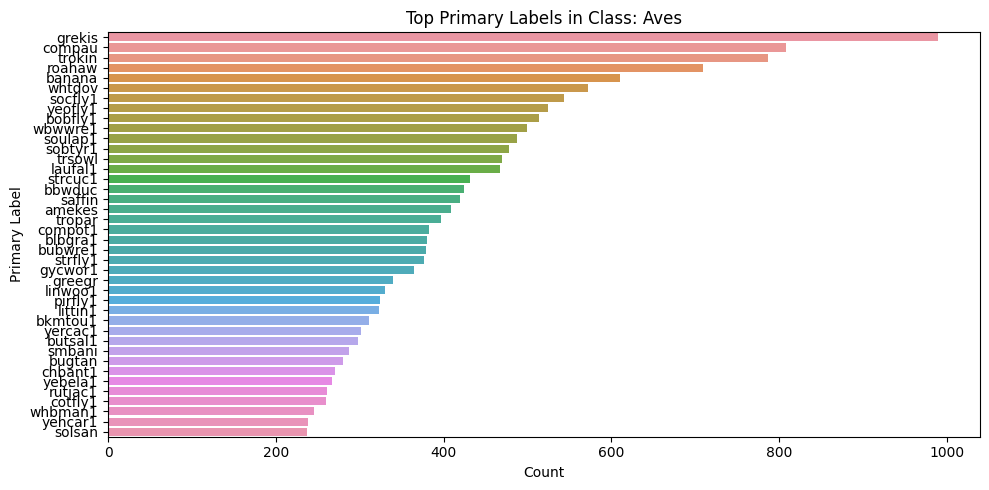

In [45]:
df[df["class_name"] == "Aves"].value_counts("primary_label").head(10)

# class_name ごとに primary_label の出現数トップ10を抽出
top_labels_per_class = {}
for class_name in df['class_name'].unique():
    top_labels = df[df["class_name"] == class_name].value_counts("primary_label").head(40)
    top_labels_per_class[class_name] = top_labels

# 棒グラフで可視化（クラスごとに別のグラフ）
for class_name, label_counts in top_labels_per_class.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=label_counts.values, y=label_counts.index)
    plt.title(f'Top Primary Labels in Class: {class_name}')
    plt.xlabel('Count')
    plt.ylabel('Primary Label')
    plt.tight_layout()
    plt.show()

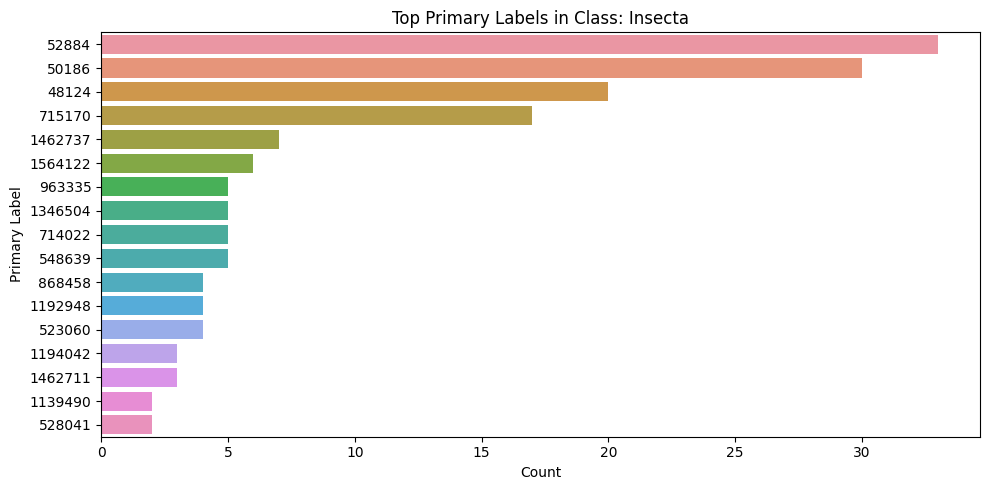

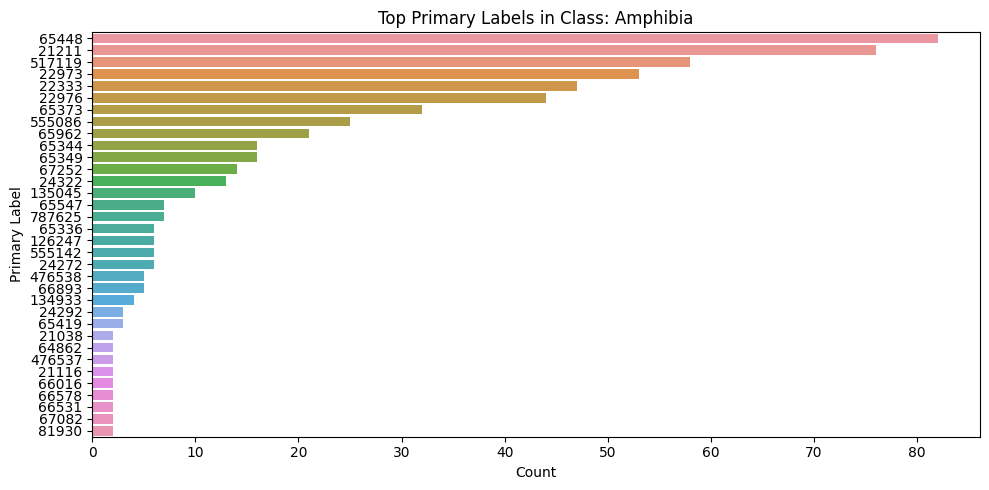

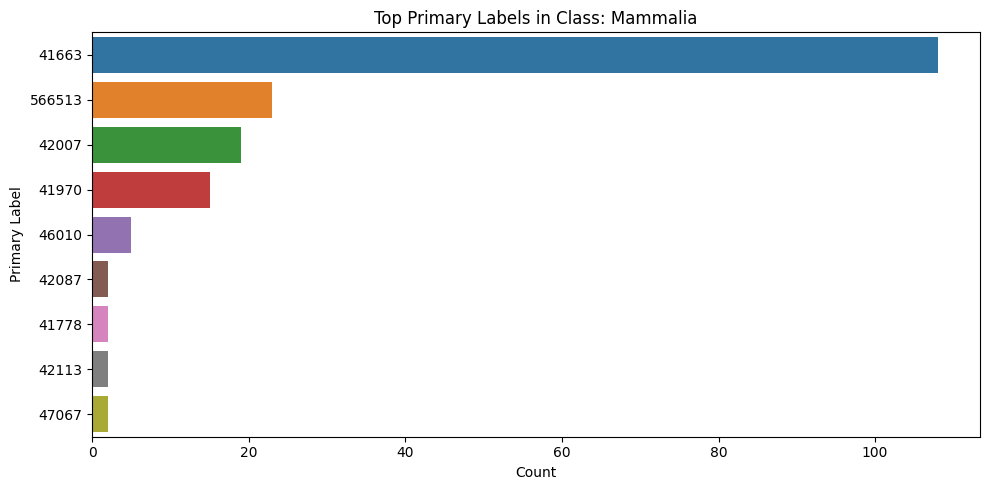

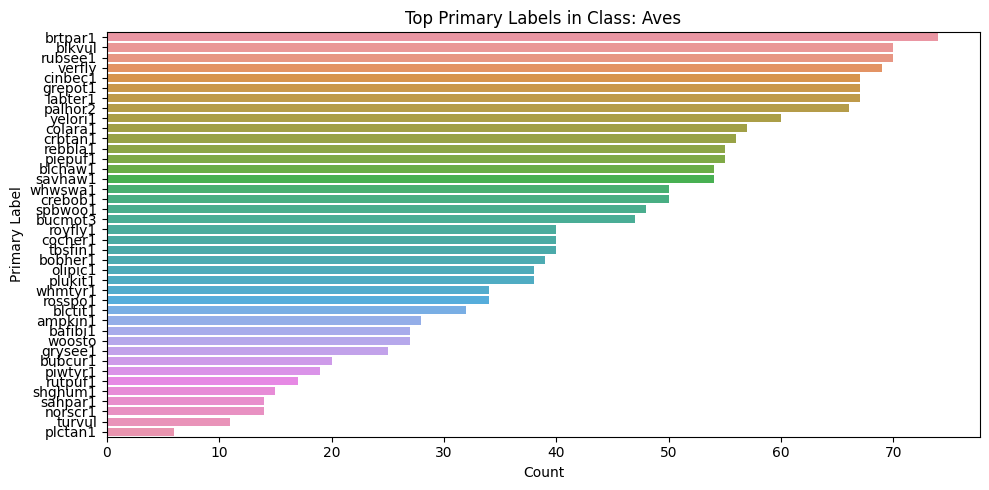

In [ ]:

# 出現数ボトム40
top_labels_per_class = {}
for class_name in df['class_name'].unique():
    top_labels = df[df["class_name"] == class_name].value_counts("primary_label").tail(40)
    top_labels_per_class[class_name] = top_labels

# 棒グラフで可視化（クラスごとに別のグラフ）
for class_name, label_counts in top_labels_per_class.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=label_counts.values, y=label_counts.index)
    plt.title(f'Top Primary Labels in Class: {class_name}')
    plt.xlabel('Count')
    plt.ylabel('Primary Label')
    plt.tight_layout()
    plt.show()


class_name ごとの primary_label のユニーク数:
   class_name  primary_label
1       Aves            146
0   Amphibia             34
2    Insecta             17
3   Mammalia              9


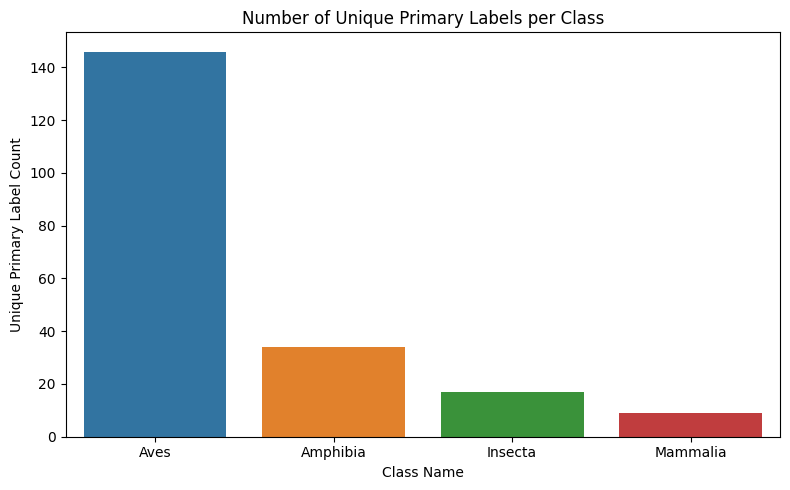

In [38]:
# 生物種ごとのラベル数
# class_name ごとの primary_label のユニーク数をカウント
label_counts = df.groupby('class_name')['primary_label'].nunique().reset_index()
label_counts = label_counts.sort_values('primary_label', ascending=False)

print("\nclass_name ごとの primary_label のユニーク数:\n", label_counts)

plt.figure(figsize=(8, 5))
sns.barplot(data=label_counts, x='class_name', y='primary_label')
plt.title('Number of Unique Primary Labels per Class')
plt.xlabel('Class Name')
plt.ylabel('Unique Primary Label Count')
plt.tight_layout()
plt.show()


class_name の分布:
 class_name
Aves        27648
Amphibia      583
Mammalia      178
Insecta       155
Name: count, dtype: int64


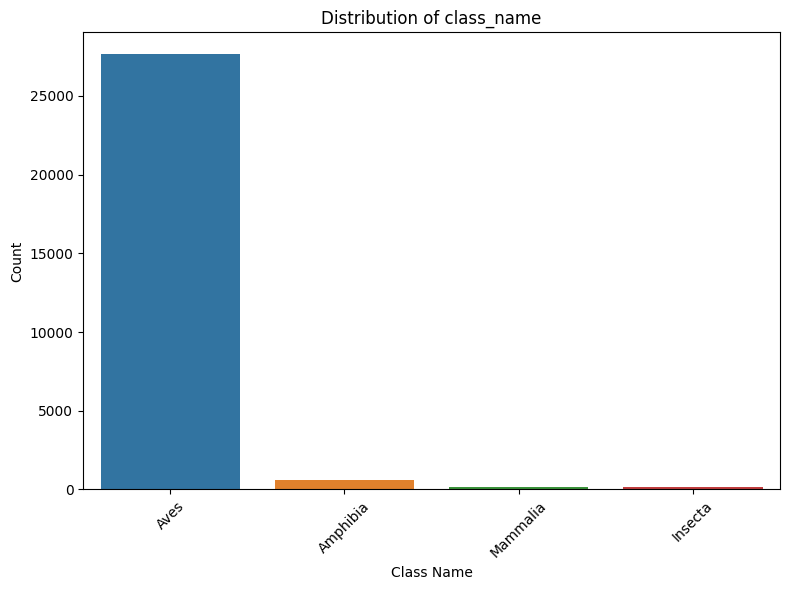

In [33]:
# --- class_name の分布 ---
print("\nclass_name の分布:\n", df['class_name'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class_name', order=df['class_name'].value_counts().index)
plt.title('Distribution of class_name')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


class_name ごとの primary_label のユニーク数:
   class_name  primary_label
1       Aves            146
0   Amphibia             34
2    Insecta             17
3   Mammalia              9


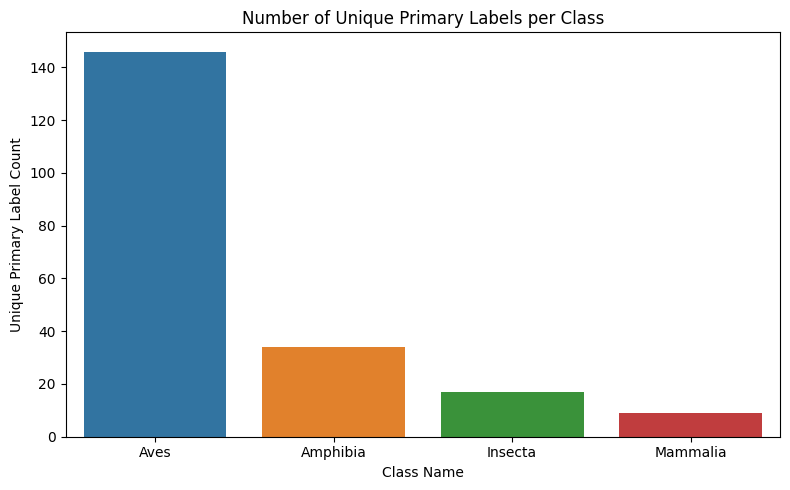


rating の分布:
 rating
0.0    7948
0.5      26
1.0     228
1.5      70
2.0     752
2.5     360
3.0    2886
3.5     895
4.0    7582
4.5    1261
5.0    6556
Name: count, dtype: int64


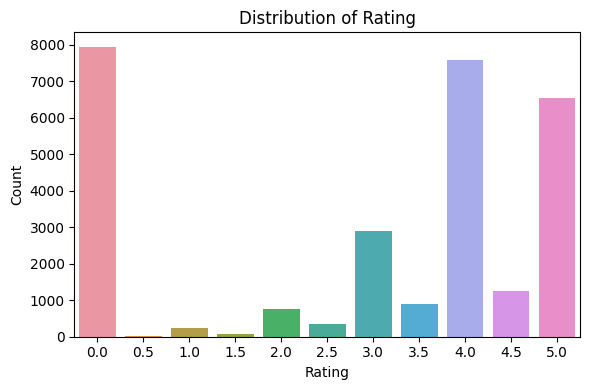

In [34]:

# --- rating の分布 ---
print("\nrating の分布:\n", df['rating'].value_counts().sort_index())


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='rating', order=sorted(df['rating'].unique()))
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

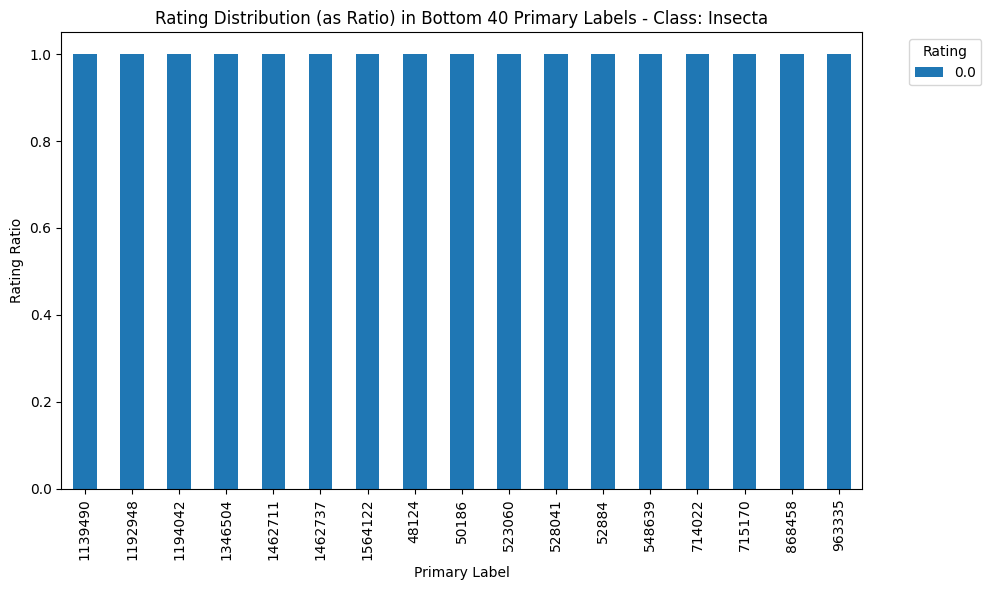

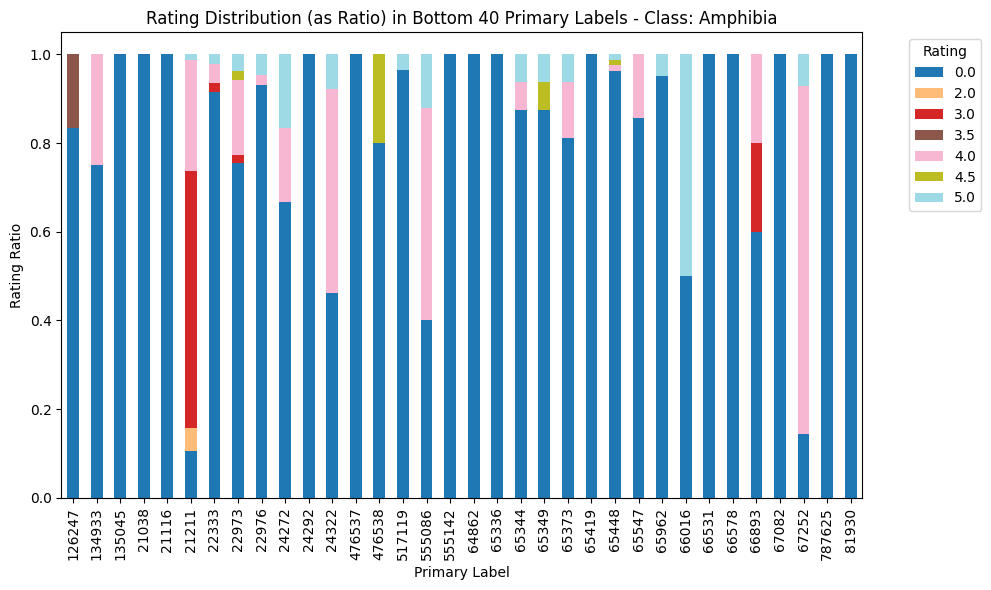

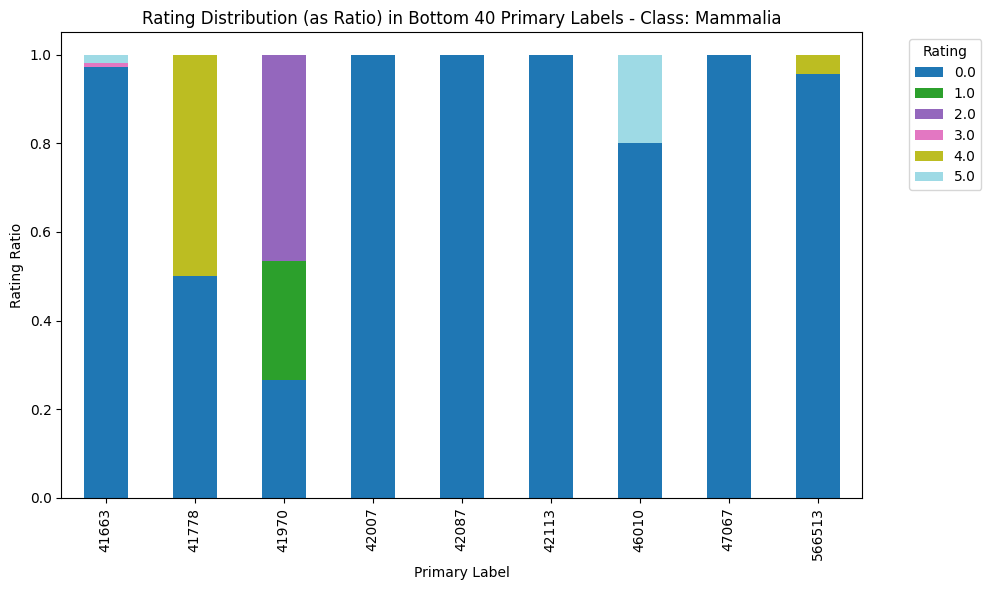

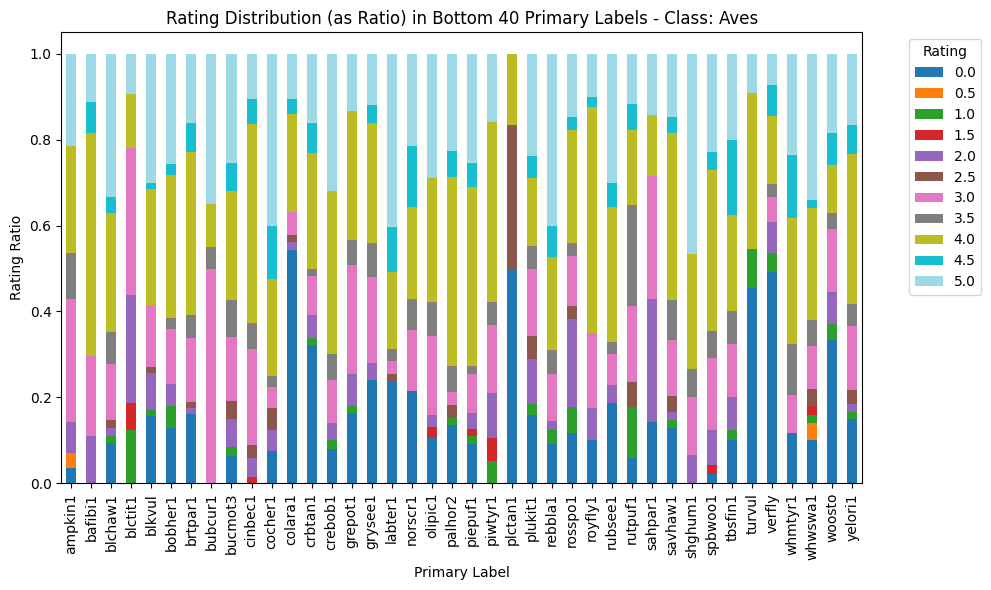

In [52]:
# クラスごとの積み上げ棒グラフ作成
for class_name in df['class_name'].unique():
    # ボトム40の primary_label を抽出
    label_counts = df[df["class_name"] == class_name].value_counts("primary_label").tail(40)
    bottom_labels = label_counts.index.tolist()

    # ボトム40に該当する行だけ抽出
    subset = df[(df["class_name"] == class_name) & (df["primary_label"].isin(bottom_labels))]

    # primary_label × rating のクロス集計（件数）
    pivot = pd.crosstab(subset['primary_label'], subset['rating'])

    # 各 primary_label ごとに割合に変換（横方向に正規化）
    pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)

    # 積み上げ棒グラフで表示
    pivot_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
    plt.title(f'Rating Distribution (as Ratio) in Bottom 40 Primary Labels - Class: {class_name}')
    plt.xlabel('Primary Label')
    plt.ylabel('Rating Ratio')
    plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

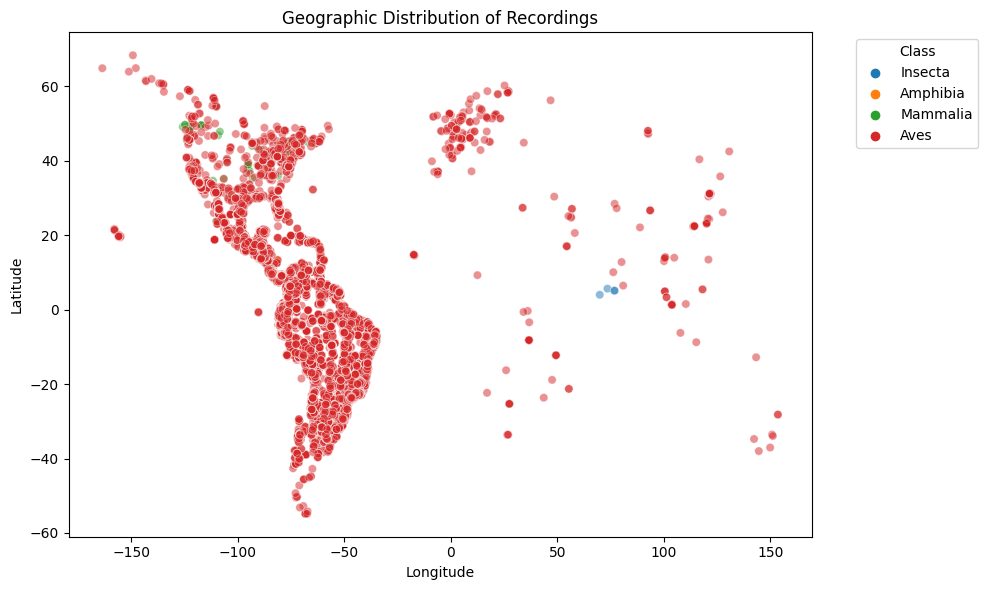

In [31]:
# --- 地理的分布の可視化 ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='class_name', alpha=0.5)
plt.title('Geographic Distribution of Recordings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

